In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
df = pd.read_csv("data.csv")
df.shape

(569, 33)

Data Munging

In [285]:
df.info()
df.eq(0).sum()
mean_con = df[df['concavity_mean'] != 0]['concavity_mean'].mean()
mean_con_m = df[df['concave points_mean'] != 0]['concave points_mean'].mean()
mean_con_se = df[df['concavity_se'] != 0]['concavity_se'].mean()
mean_con_m_se = df[df['concave points_se'] != 0]['concave points_se'].mean()
mean_con_w = df[df['concavity_worst'] != 0]['concavity_worst'].mean()
mean_con_m_w = df[df['concave points_worst'] != 0]['concave points_worst'].mean()

df['concavity_mean'].replace(0, mean_con, inplace=True)
df['concave points_mean'].replace(0, mean_con_m, inplace=True)
df['concavity_se'].replace(0, mean_con_se, inplace=True)
df['concave points_se'].replace(0, mean_con_m_se, inplace=True)
df['concavity_worst'].replace(0, mean_con_w, inplace=True)
df['concave points_worst'].replace(0, mean_con_m_w, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [286]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Data Munging

In [287]:
#Remove unneeded columns
df = df.drop(["id", "Unnamed: 32"],axis=1)

In [288]:
#Count is accurate but the mean and std are quite different
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.090876,0.050063,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.278553,0.117286,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.078553,0.038074,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.204423,0.063349,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000692,0.001852,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.001845,0.008772,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.031360,0.021070,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.124200,0.066960,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.066640,0.037000,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.241300,0.104700,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [289]:
#Convert the data to numerical
diagnosis = {'M': 1, 'B': 0}
df["diagnosis"] = df["diagnosis"].map(diagnosis)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Getting Optimal Cluster Number for Kmeans

In [291]:
#Get euclidean distance
distortions = []
for i in range(1, 11):
    clustering = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    clustering.fit(df)
    distortions.append(clustering.inertia_)
print(distortions)

[256677375.6539907, 77943166.73748788, 47421909.555304185, 29226593.410788294, 20672748.699148037, 16693075.67021011, 13280333.521363636, 11600612.58470286, 10648653.10647077, 10163759.61763019]


In [292]:
#Get optimal cluster number
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), distortions, curve="convex", direction="decreasing")
kl.elbow

3

<AxesSubplot: >

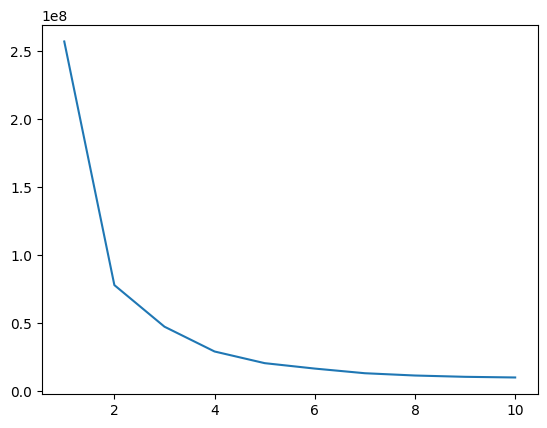

In [293]:
#Elbow method
ks = []
for i in range(1, 11):
    ks.append(i)
sns.lineplot(x = ks,y = distortions)

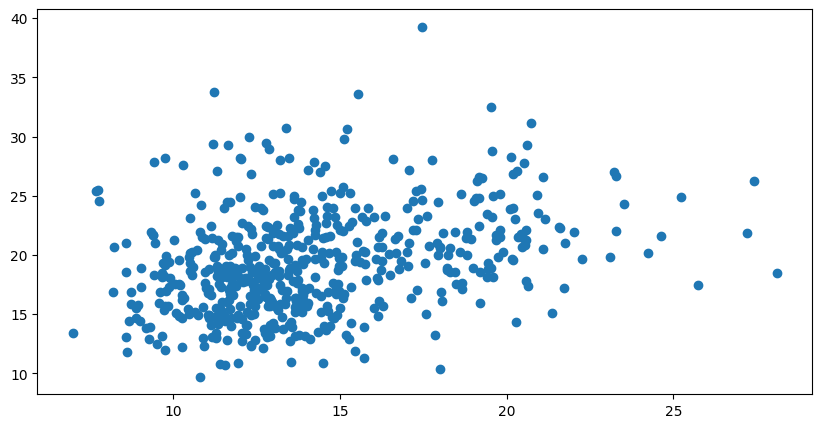

In [294]:
#Before clustering
x = df.drop("diagnosis", axis=1)
y = df["diagnosis"]
plt.figure(figsize=(10,5))
plt.scatter(x= x.iloc[:, 0], y=x.iloc[:, 1])

KMeans Model

In [295]:
#Splitting and training the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
s=StandardScaler()
pca = PCA(n_components=10)
x_scaled = s.fit_transform(x)
x_pca = pca.fit_transform(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=50)
x_train_scaled=s.fit_transform(x_train)
x_test_scaled=s.transform(x_test)


In [296]:
#Fit the dataset into the algorithm
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, shuffle=True)
kmeans = KMeans(n_clusters=3, random_state=0) 
scores = cross_val_score(kmeans, x_pca, y, cv=kfold)
print(f"Mean score: {scores.mean():.3f}")
print(f"Standard deviation: {scores.std():.3f}")

Mean score: -944.324
Standard deviation: 186.711


In [297]:
kmeans.fit(x)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,random_state=0, tol=0.0001, verbose=0)
centroids = kmeans.cluster_centers_

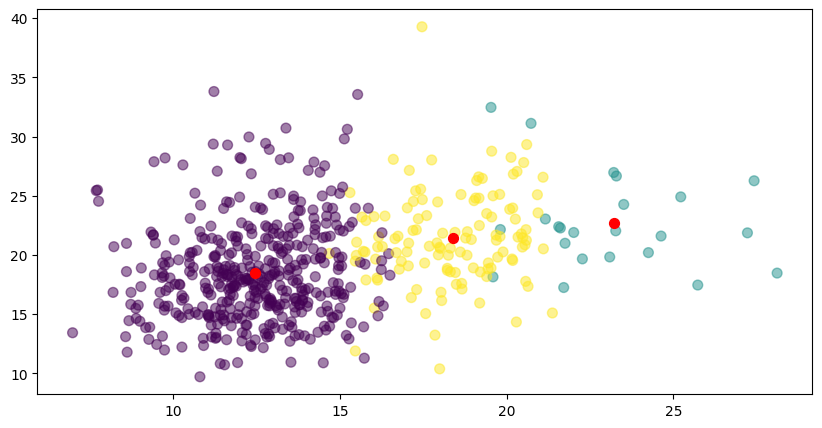

In [298]:
km = KMeans(n_clusters = 3)
labels = km.fit(x)
predict = km.predict(x)
#After clustering
plt.figure(figsize=(10,5))
plt.scatter(x= x.iloc[:, 0], y=x.iloc[:, 1], c= km.labels_.astype(float), s= 50, alpha= 0.5)
plt.scatter(centroids[:,0], centroids[:,1], c = "red", s=50)
plt.savefig("kmeans")


In [299]:
diag = np.array(df['diagnosis'])
labels = km.labels_
matches = 0
for i in range(0, len(diag)):
    if diag[i] == labels[i]:
        matches = matches +1
percentMatch = (matches/len(diag))*100
print("Percent matched between benign and malignant ", percentMatch)

Percent matched between benign and malignant  66.4323374340949


In [300]:
from sklearn.metrics import silhouette_score
score = silhouette_score(x, km.labels_, metric='euclidean')
print("Silhouette Score: %.3f" % score)

Silhouette Score: 0.666
